In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
import pandas as pd

# Charger le fichier (1 seule feuille)
df_kpis = pd.read_excel("benchmark_kpis.xlsx")

# Afficher un aperçu
print("✅ Dimensions :", df_kpis.shape)
display(df_kpis.head())


✅ Dimensions : (1025, 7)


,metric_name,value,unit,year,company,page,source_file
0,Produção de energia renovável,732,GWh,2022,2W,4,2W Ecobank SA_2022_Report.pdf - chunk 1
1,Investimentos no parque eólico Anemus,800,milhões de R$,2022,2W,4,2W Ecobank SA_2022_Report.pdf - chunk 1
2,Unidades consumidoras no varejo,507,unidades,2022,2W,5,2W Ecobank SA_2022_Report.pdf - chunk 1
3,Receita líquida,1.2,bilhão de R$,2022,2W,5,2W Ecobank SA_2022_Report.pdf - chunk 1
4,Aumento no número de unidades consumidoras,92,%,2022,2W,5,2W Ecobank SA_2022_Report.pdf - chunk 1


In [23]:
# Nettoyer le nom de la colonne s'il y a des NaN
df_kpis['company'] = df_kpis['company'].fillna("Inconnu")

# Benchmark : nombre de KPIs par entreprise
kpi_par_entreprise = df_kpis.groupby("company").size().reset_index(name="nb_kpis")

# Trier par nombre décroissant
kpi_par_entreprise = kpi_par_entreprise.sort_values(by="nb_kpis", ascending=False)

# Afficher
print("🏢 Nombre de KPIs extraits par entreprise :")
display(kpi_par_entreprise.head(10))  # Top 10


🏢 Nombre de KPIs extraits par entreprise :


,company,nb_kpis
2,AES Brasil,266
16,Canadian Solar,144
17,Ceres,110
76,中華紙漿,75
77,華紙,60
1,2W Ecobank,53
0,2W,52
37,Not specified,34
10,Bloom Energy,30
31,Inconnu,22


In [24]:
# Nombre d’occurrences de chaque KPI (nom métrique)
kpi_frequents = df_kpis['metric_name'].value_counts().reset_index()
kpi_frequents.columns = ["metric_name", "nb_occurrences"]

# Affichage top 20
print("📌 KPIs les plus fréquents dans les rapports :")
display(kpi_frequents.head(20))


📌 KPIs les plus fréquents dans les rapports :


,metric_name,nb_occurrences
0,Average availability factor per power plant,90
1,Average availability factor,30
2,Duration of outages per power plant,6
3,Renewable energy percentage,5
4,Average module wattage,4
5,GHG emissions intensity,4
6,Scope 3 Other indirect emissions,3
7,RIDDOR rate,3
8,Employee Retention Rate,3
9,Total Recordable Injury Rate (TRIR),3


In [25]:
# 🔎 Spécifie ici le nom du KPI à benchmarker (copié depuis le top)
kpi_cible = "Average availability factor"

# 🎯 Filtrer uniquement les lignes contenant ce KPI
df_kpi_specific = df_kpis[df_kpis["metric_name"].str.lower() == kpi_cible.lower()]

# 🧼 Nettoyer les valeurs si nécessaire (convertir en float)
df_kpi_specific["value"] = pd.to_numeric(df_kpi_specific["value"], errors="coerce")

# ❌ Supprimer les lignes sans valeur numérique
df_kpi_specific = df_kpi_specific.dropna(subset=["value"])

# 📊 Afficher les valeurs par entreprise
df_kpi_specific_sorted = df_kpi_specific.sort_values(by="value", ascending=False)
display(df_kpi_specific_sorted[["company", "value", "unit", "year", "source_file"]])


C:\Users\user\AppData\Local\Temp\ipykernel_16396\3438660016.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kpi_specific["value"] = pd.to_numeric(df_kpi_specific["value"], errors="coerce")


,company,value,unit,year,source_file
523,Guaimbê Solar Power Complex,99.6,%,2023,AES Brasil_2023_Report.pdf - chunk 26
522,Boa Hora,99.2,%,2023,AES Brasil_2023_Report.pdf - chunk 26
521,AGV,97.6,%,2023,AES Brasil_2023_Report.pdf - chunk 26
518,Vento,95.3,%,2023,AES Brasil_2023_Report.pdf - chunk 26
515,Santo Onofre I,94.3,%,2023,AES Brasil_2023_Report.pdf - chunk 26
520,Brisa,93.7,%,2023,AES Brasil_2023_Report.pdf - chunk 26
498,Icaraí de Amontada,93.6,%,2023,AES Brasil_2023_Report.pdf - chunk 26
517,Santo Onofre III,93.5,%,2023,AES Brasil_2023_Report.pdf - chunk 26
516,Santo Onofre II,93.5,%,2023,AES Brasil_2023_Report.pdf - chunk 26
513,Santa Joana VIII,93.4,%,2023,AES Brasil_2023_Report.pdf - chunk 26


C:\Users\user\AppData\Local\Temp\ipykernel_16396\714714257.py:19: UserWarning: Glyph 128295 (\N{WRENCH}) missing from current font.
  plt.tight_layout()
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128295 (\N{WRENCH}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


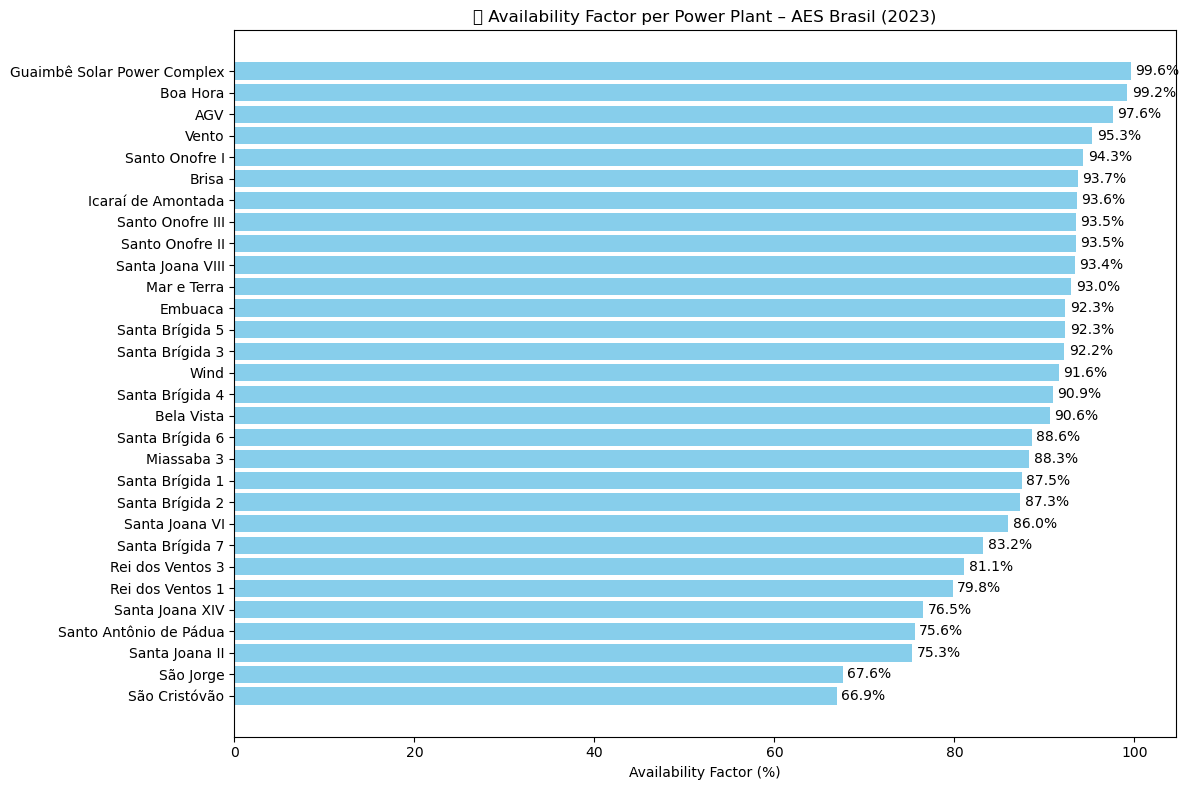

In [26]:
import matplotlib.pyplot as plt

# 📌 Trier du plus performant au moins performant
df_kpi_specific_sorted = df_kpi_specific.sort_values(by="value", ascending=False)

# 🎨 Taille du graphique
plt.figure(figsize=(12, 8))

# 📊 Bar chart horizontal
plt.barh(df_kpi_specific_sorted["company"], df_kpi_specific_sorted["value"], color='skyblue')
plt.xlabel("Availability Factor (%)")
plt.title("🔧 Availability Factor per Power Plant – AES Brasil (2023)")
plt.gca().invert_yaxis()  # Inverser pour voir le plus haut en haut

# 📦 Ajouter les valeurs sur les barres
for i, v in enumerate(df_kpi_specific_sorted["value"]):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')

plt.tight_layout()
plt.show()
